## exploration of t-SNE dimensionality reduction on the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [75]:
# Importing KNN, SVM, and Logistic Regression models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [76]:
data = pd.read_csv('data/bankruptcy.csv')

In [77]:
#tSNE the dataset
scaler = StandardScaler()
X = data.drop(columns = 'Bankrupt')
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=50)
#lowering dimensions to 50 first via pca
X_scaled = pca.fit_transform(X_scaled) 


We're going to do several embeddings into two dimensions with different values for the Perplexity values

In [78]:
#applying t-SNE with different perplexity values
X_scaled_embedded_perp10 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10.0,random_state = 10).fit_transform(X_scaled)
X_scaled_embedded_perp30 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30.0,random_state = 10).fit_transform(X_scaled)
X_scaled_embedded_perp50 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50.0,random_state = 10).fit_transform(X_scaled)
X_scaled_embedded_perp70 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=70.0,random_state = 10).fit_transform(X_scaled)
X_scaled_embedded_perp90 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=90.0,random_state = 10).fit_transform(X_scaled)
X_scaled_embedded_perp120 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=120.0,random_state = 10).fit_transform(X_scaled)

Plots below

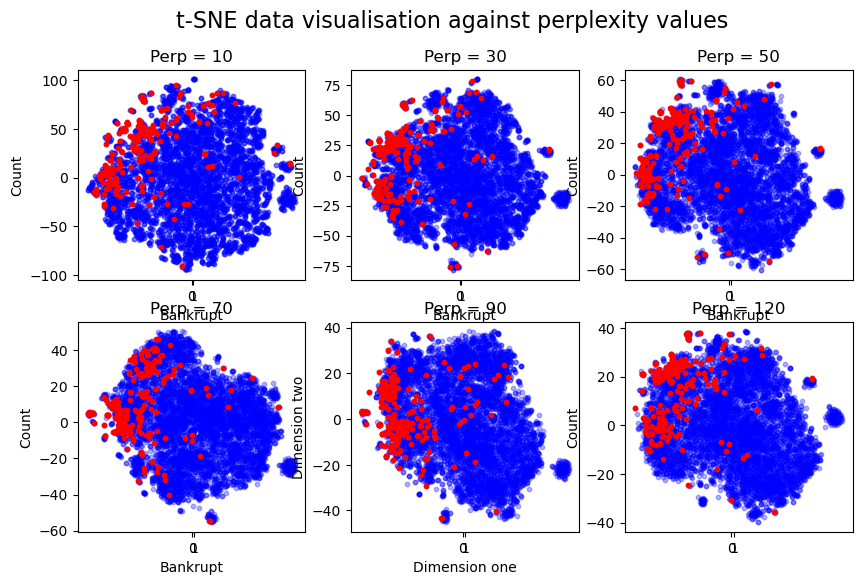

In [79]:
fig, ax = plt.subplots(2,3,figsize = (10,6))

fig.suptitle('t-SNE data visualisation against perplexity values', fontsize=16)
ax[0][0].scatter(X_scaled_embedded_perp10[data['Bankrupt'] == 0][:,0],X_scaled_embedded_perp10[data['Bankrupt'] == 0][:,1], c = 'b', alpha = 0.3, s = 10)
ax[0][0].scatter(X_scaled_embedded_perp10[data['Bankrupt'] == 1][:,0],X_scaled_embedded_perp10[data['Bankrupt'] == 1][:,1], c = 'r', s = 10)
ax[0][0].set_xlabel('Bankrupt')
ax[0][0].set_ylabel('Count')
ax[0][0].set_xticks([0,1])
ax[0][0].set_title('Perp = 10')

ax[0][1].scatter(X_scaled_embedded_perp30[data['Bankrupt'] == 0][:,0],X_scaled_embedded_perp30[data['Bankrupt'] == 0][:,1], c = 'b', alpha = 0.3, s = 10)
ax[0][1].scatter(X_scaled_embedded_perp30[data['Bankrupt'] == 1][:,0],X_scaled_embedded_perp30[data['Bankrupt'] == 1][:,1], c = 'r', s = 10)
ax[0][1].set_xlabel('Bankrupt')
ax[0][1].set_ylabel('Count')
ax[0][1].set_xticks([0,1])
ax[0][1].set_title('Perp = 30')

ax[0][2].scatter(X_scaled_embedded_perp50[data['Bankrupt'] == 0][:,0],X_scaled_embedded_perp50[data['Bankrupt'] == 0][:,1], c = 'b', alpha = 0.3, s = 10)
ax[0][2].scatter(X_scaled_embedded_perp50[data['Bankrupt'] == 1][:,0],X_scaled_embedded_perp50[data['Bankrupt'] == 1][:,1], c = 'r', s = 10)
ax[0][2].set_xlabel('Bankrupt')
ax[0][2].set_ylabel('Count')
ax[0][2].set_xticks([0,1])
ax[0][2].set_title('Perp = 50')

ax[1][0].scatter(X_scaled_embedded_perp70[data['Bankrupt'] == 0][:,0],X_scaled_embedded_perp70[data['Bankrupt'] == 0][:,1], c = 'b', alpha = 0.3, s = 10)
ax[1][0].scatter(X_scaled_embedded_perp70[data['Bankrupt'] == 1][:,0],X_scaled_embedded_perp70[data['Bankrupt'] == 1][:,1], c = 'r', s = 10)
ax[1][0].set_xlabel('Bankrupt')
ax[1][0].set_ylabel('Count')
ax[1][0].set_xticks([0,1])
ax[1][0].set_title('Perp = 70')

ax[1][1].scatter(X_scaled_embedded_perp90[data['Bankrupt'] == 0][:,0],X_scaled_embedded_perp90[data['Bankrupt'] == 0][:,1], c = 'b', alpha = 0.3, s = 10)
ax[1][1].scatter(X_scaled_embedded_perp90[data['Bankrupt'] == 1][:,0],X_scaled_embedded_perp90[data['Bankrupt'] == 1][:,1], c = 'r', s = 10)
ax[1][1].set_xlabel('Dimension one')
ax[1][1].set_ylabel('Dimension two')
ax[1][1].set_xticks([0,1])
ax[1][1].set_title('Perp = 90')

ax[1][2].scatter(X_scaled_embedded_perp120[data['Bankrupt'] == 0][:,0],X_scaled_embedded_perp120[data['Bankrupt'] == 0][:,1], c = 'b', alpha = 0.3, s = 10)
ax[1][2].scatter(X_scaled_embedded_perp120[data['Bankrupt'] == 1][:,0],X_scaled_embedded_perp120[data['Bankrupt'] == 1][:,1], c = 'r', s = 10)
ax[1][2].set_ylabel('Count')
ax[1][2].set_xticks([0,1])
ax[1][2].set_title('Perp = 120')


plt.show()

From the figures, we can see desirable clustering behaviour in the 30, 50, 70 and 90 peplexity plots, with the 10 and 120 plots having less density of "bankrupt" datapoints around the clusters. From this we can conjecture that the 30-90 range for perplexity should give us a useful tSNE structure